# **WEATHER FORECASTING**

In [1]:
problem_statement = """Include a broader range of meteorological parameters and use advanced
ML models like XGBoost to improve weather forecasting accuracy and insights."""
print(problem_statement)

Include a broader range of meteorological parameters and use advanced
ML models like XGBoost to improve weather forecasting accuracy and insights.


# **1) UNDERSTANDING THE PROBLEM**
Accurately predicting weather patterns is vital for agriculture, disaster management, and daily decision-making. This project focuses on leveraging historical weather data and advanced machine learning models to forecast meteorological conditions with high precision.

# **2) DATA COLLECTION**
Collecting comprehensive meteorological datasets that include a variety of features such as temperature, humidity, wind speed, and rainfall is essential for building a strong foundation for weather forecasting models.

## **2.1) IMPORTING NECESSARY LIBRARIES**
Importing essential libraries for data manipulation, visualization, preprocessing, and model building. These libraries provide the tools needed for effective data analysis and model training.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

### **2.2) LOADING DATASET**
Loading the meteorological dataset into a DataFrame to analyze and process the data for further analysis and model training.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1= pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
df2= pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')

# **3) DATA UNDERSTANDING**
Exploring the dataset to gain insights into its structure, summary statistics, and initial rows. This step helps identify key features, detect potential issues such as missing values, and understand the overall distribution of the data.

In [5]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
# Concatenate the DataFrames
df = pd.concat([df1, df2], ignore_index=True)

In [9]:
df.head()
df.shape

(290920, 23)

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
290915,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
290916,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
290917,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
290918,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
290919,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290920 entries, 0 to 290919
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           290920 non-null  object 
 1   Location       290920 non-null  object 
 2   MinTemp        287950 non-null  float64
 3   MaxTemp        288398 non-null  float64
 4   Rainfall       284398 non-null  float64
 5   Evaporation    165340 non-null  float64
 6   Sunshine       151250 non-null  float64
 7   WindGustDir    270268 non-null  object 
 8   WindGustSpeed  270394 non-null  float64
 9   WindDir9am     269788 non-null  object 
 10  WindDir3pm     282464 non-null  object 
 11  WindSpeed9am   287386 non-null  float64
 12  WindSpeed3pm   284796 non-null  float64
 13  Humidity9am    285612 non-null  float64
 14  Humidity3pm    281906 non-null  float64
 15  Pressure9am    260790 non-null  float64
 16  Pressure3pm    260864 non-null  float64
 17  Cloud9am       179144 non-nul

In [14]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,287950.000000,288398.000000,284398.000000,165340.000000,151250.000000,270394.000000,287386.000000,284796.000000,285612.000000,281906.000000,260790.000000,260864.000000,179144.000000,172204.000000,287386.000000,283702.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390
std,6.398484,7.119037,8.478045,4.193691,3.785470,13.607037,8.915360,8.809785,19.029131,20.795865,7.106517,7.037400,2.887151,2.720349,6.488742,6.936638
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [15]:
df.nunique()

,0
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


In [16]:
df.count()

,0
Date,290920
Location,290920
MinTemp,287950
MaxTemp,288398
Rainfall,284398
Evaporation,165340
Sunshine,151250
WindGustDir,270268
WindGustSpeed,270394
WindDir9am,269788


# **4) DATA CLEANING**
Data cleaning involves handling missing values, correcting inconsistencies, and removing duplicates or outliers. This step ensures the dataset is reliable and ready for analysis, improving the quality of the model's predictions.

## **4.1) HANDLING MISSING VALUES**
Handling missing values is a critical step in preparing the dataset for analysis and modeling. This process involves identifying and addressing missing or null data through techniques such as imputation, removal, or substitution with appropriate values, ensuring that the dataset is complete and ready for further processing.

In [17]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,2970
MaxTemp,2522
Rainfall,6522
Evaporation,125580
Sunshine,139670
WindGustDir,20652
WindGustSpeed,20526
WindDir9am,21132


In [18]:
print(df.isnull().sum())

Date                  0
Location              0
MinTemp            2970
MaxTemp            2522
Rainfall           6522
Evaporation      125580
Sunshine         139670
WindGustDir       20652
WindGustSpeed     20526
WindDir9am        21132
WindDir3pm         8456
WindSpeed9am       3534
WindSpeed3pm       6124
Humidity9am        5308
Humidity3pm        9014
Pressure9am       30130
Pressure3pm       30056
Cloud9am         111776
Cloud3pm         118716
Temp9am            3534
Temp3pm            7218
RainToday          6522
RainTomorrow       6534
dtype: int64


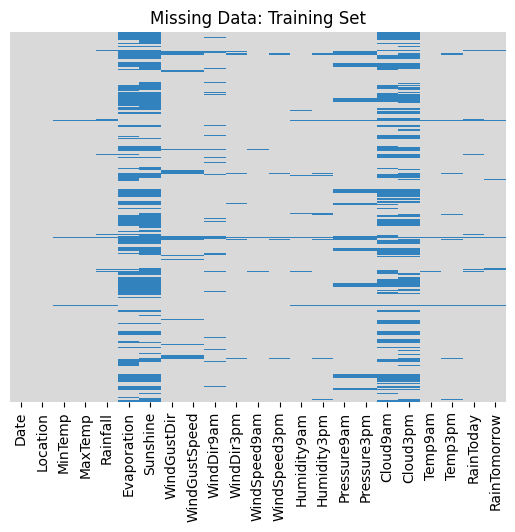

In [19]:
# Heatmap for showing how many missing data's
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [20]:
# checking percentage of missing values in attributes
df.isnull().mean()*100

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


In [21]:
df.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [22]:
df['Evaporation'].mode()

,Evaporation
0,4.0


In [23]:
# import simple imputer
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data with the imputer

MinTemp_imputed = imputer.fit_transform(df[['MinTemp']])
MaxTemp_imputed = imputer.fit_transform(df[['MaxTemp']])
Evaporation_imputed = imputer.fit_transform(df[['Evaporation']])
Sunshine_imputed = imputer.fit_transform(df[['Sunshine']])
Rainfall_imputed = imputer.fit_transform(df[['Rainfall']])
WindGustSpeed_imputed = imputer.fit_transform(df[['WindGustSpeed']])
WindSpeed9am_imputed = imputer.fit_transform(df[['WindSpeed9am']])
WindSpeed3pm_imputed = imputer.fit_transform(df[['WindSpeed3pm']])
Humidity9am_imputed = imputer.fit_transform(df[['Humidity9am']])
Humidity3pm_imputed = imputer.fit_transform(df[['Humidity3pm']])
Pressure9am_imputed = imputer.fit_transform(df[['Pressure9am']])
Pressure3pm_imputed = imputer.fit_transform(df[['Pressure3pm']])
Cloud9am_imputed = imputer.fit_transform(df[['Cloud9am']])
Cloud3pm_imputed = imputer.fit_transform(df[['Cloud3pm']])
Temp9am_imputed = imputer.fit_transform(df[['Temp9am']])
Temp3pm_imputed = imputer.fit_transform(df[['Temp3pm']])

# Replace the original "Age" column with the imputed values
df['MinTemp'] = MinTemp_imputed
df['MaxTemp'] = MaxTemp_imputed
df['Evaporation'] = Evaporation_imputed
df['Sunshine'] = Sunshine_imputed
df['WindGustSpeed'] = WindGustSpeed_imputed
df['Humidity9am'] = Humidity9am_imputed
df['WindSpeed9am'] = Evaporation_imputed
df['WindSpeed3pm'] = Sunshine_imputed
df['Rainfall'] = Rainfall_imputed
df['Humidity3pm'] = Humidity3pm_imputed
df['Pressure9am'] = Pressure9am_imputed
df['Pressure3pm'] = Pressure3pm_imputed
df['Cloud9am'] = Cloud9am_imputed
df['Cloud3pm'] = Cloud3pm_imputed
df['Temp9am'] = Temp9am_imputed
df['Temp3pm'] = Temp3pm_imputed

In [24]:
#Fill missing values with the most frequent value for each column
for column in df.columns:
    most_frequent_value = df[column].mode()[0]
    df.fillna({column: most_frequent_value}, inplace=True)

In [25]:
# checking percentage of missing values in attributes
df.isnull().mean()*100

,0
Date,0.0
Location,0.0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,0.0
Sunshine,0.0
WindGustDir,0.0
WindGustSpeed,0.0
WindDir9am,0.0


In [26]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


# **5) EXPLORATORY DATA ANALYSIS (EDA)**
Exploratory Data Analysis involves visualizing and analyzing the dataset to uncover patterns, trends, and relationships between variables. This step helps in understanding the underlying structure of the data, identifying correlations, and informing decisions for feature engineering and model selection.

<Axes: ylabel='Pressure9am'>

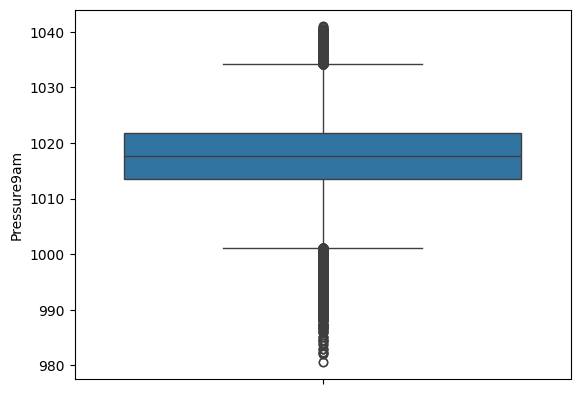

In [27]:
# boxplot use for outlier detection
sns.boxplot(df["Pressure9am"])

<Axes: xlabel='RainToday'>

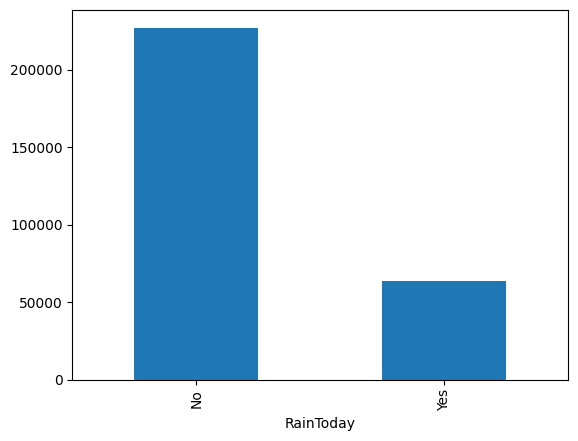

In [28]:
df['RainToday'].value_counts().plot(kind='bar')

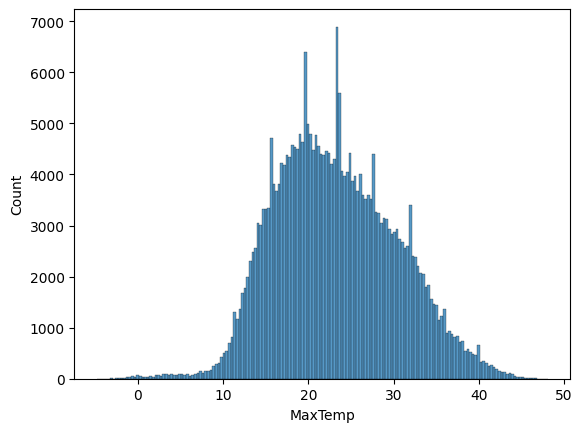

In [29]:
sns.histplot(df['MaxTemp'],kde=False)
plt.show()

# **6) DATA PREPROCESSING**
Data preprocessing involves transforming raw data into a clean and structured format suitable for analysis and modeling. This step includes tasks like handling missing values, encoding categorical variables, scaling features, and preparing the dataset for training machine learning models.



## **6.1) LABEL ENCODING**
Label encoding transforms categorical labels into numerical values, enabling machine learning models to process and understand non-numeric data. This step is essential for converting target variables or features with categorical data into a machine-readable format, ensuring seamless model training and evaluation.

In [30]:
# import labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [31]:
# Initialize LabelEncoder
label_en= LabelEncoder()

# fit and transfoam the labelencoding
df['RainToday']= label_en.fit_transform(df['RainToday'])
df['Location']= label_en.fit_transform(df['Location'])
df['WindDir9am']= label_en.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_en.fit_transform(df['WindDir3pm'])
df['WindGustDir']= label_en.fit_transform(df['WindGustDir'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290920 entries, 0 to 290919
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           290920 non-null  object 
 1   Location       290920 non-null  int64  
 2   MinTemp        290920 non-null  float64
 3   MaxTemp        290920 non-null  float64
 4   Rainfall       290920 non-null  float64
 5   Evaporation    290920 non-null  float64
 6   Sunshine       290920 non-null  float64
 7   WindGustDir    290920 non-null  int64  
 8   WindGustSpeed  290920 non-null  float64
 9   WindDir9am     290920 non-null  int64  
 10  WindDir3pm     290920 non-null  int64  
 11  WindSpeed9am   290920 non-null  float64
 12  WindSpeed3pm   290920 non-null  float64
 13  Humidity9am    290920 non-null  float64
 14  Humidity3pm    290920 non-null  float64
 15  Pressure9am    290920 non-null  float64
 16  Pressure3pm    290920 non-null  float64
 17  Cloud9am       290920 non-nul

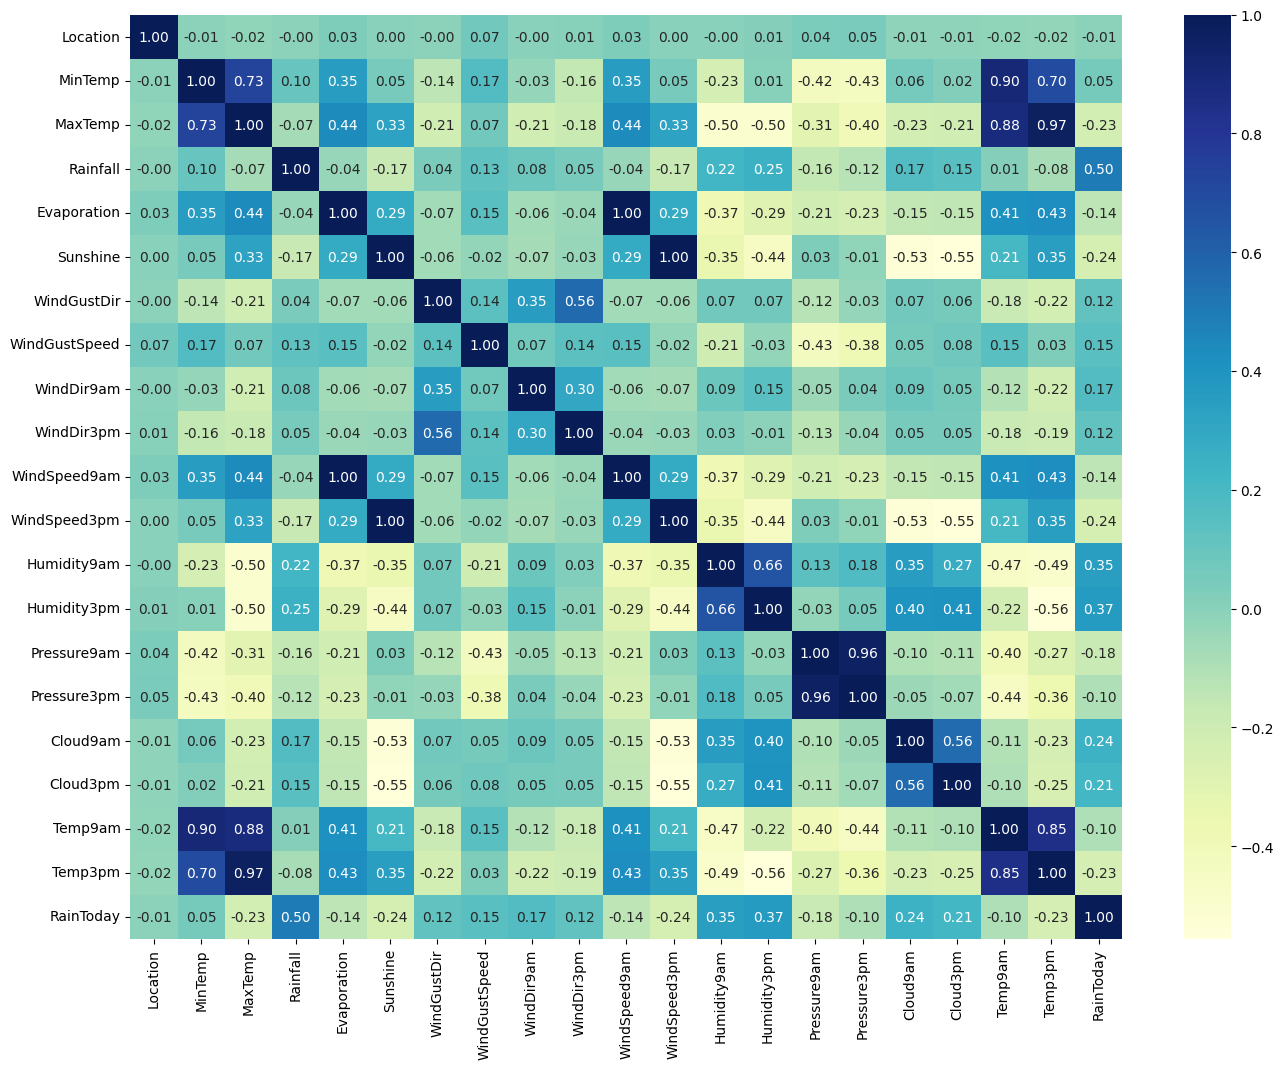

In [33]:
plt.subplots(figsize=(16, 12))
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
# Extract numerical features for correlation
numerical_features = df.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

### **6.2) DATA SPLITTING**
Data splitting involves dividing the dataset into training and testing subsets to evaluate the model's performance. By allocating a portion of the data for training and another for testing, this step ensures the model is trained on one set and validated on unseen data, promoting robust and unbiased performance assessment.

In [34]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('RainTomorrow', axis = 1) # grabs everything else but ''

# Create target variable
y = df['RainTomorrow'] # y is the column we're trying to predict

In [35]:
x.shape

(290920, 22)

In [36]:
y.shape

(290920,)

#### **6.3) FEATURE SCALING**
Feature scaling standardizes or normalizes data to ensure all features contribute equally to the model's performance. By rescaling variables to a common range, this step enhances the efficiency and accuracy of machine learning algorithms, especially those sensitive to feature magnitudes, like gradient descent-based models.

In [37]:
from sklearn import preprocessing

# Drop the 'Date' column before scaling
x_scaled = x.drop('Date', axis=1)

# Fit and transform the StandardScaler on numerical features only
pre_process = preprocessing.StandardScaler().fit(x_scaled)
x_transform = pre_process.transform(x_scaled)

# If you need the 'Date' column later, you can re-add it to the transformed data
x_transform = pd.concat([x['Date'], pd.DataFrame(x_transform)], axis=1)

In [38]:
x_transform

,Date,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,2008-12-01,-1.531666,0.189447,-4.533631e-02,-0.210072,-5.618662e-16,3.254025e-16,1.045228,0.302234,1.328766,...,3.254025e-16,0.112395,-1.442965,-1.478788,-1.223882,1.568037e+00,0.000000,-0.014053,0.017023,-0.529795
1,2008-12-02,-1.531666,-0.753101,2.650431e-01,-0.281650,-5.618662e-16,3.254025e-16,1.258262,0.302234,-0.221338,...,3.254025e-16,-1.319609,-1.296417,-1.047782,-1.118839,-3.920285e-16,0.000000,0.032464,0.381985,-0.529795
2,2008-12-03,-1.531666,0.110901,3.496920e-01,-0.281650,-5.618662e-16,3.254025e-16,1.471296,0.454694,1.328766,...,3.254025e-16,-1.637832,-1.052171,-1.493650,-0.983784,-3.920285e-16,-1.199232,0.621685,0.221402,-0.529795
3,2008-12-04,-1.531666,-0.470337,6.741796e-01,-0.281650,-5.618662e-16,3.254025e-16,-0.872075,-1.222364,0.442992,...,3.254025e-16,-1.266572,-1.736061,-0.007422,-0.368534,-3.920285e-16,0.000000,0.172017,0.703151,-0.529795
4,2008-12-05,-1.531666,0.833521,1.280830e+00,-0.162353,-5.618662e-16,3.254025e-16,1.045228,0.073544,-1.328556,...,3.254025e-16,0.695804,-0.905623,-1.018057,-1.388949,1.126652e+00,1.667539,0.125499,1.170302,-0.529795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290915,2017-06-21,1.209285,-1.475720,2.520446e-02,-0.281650,-5.618662e-16,3.254025e-16,-1.724209,-0.688755,0.442992,...,3.254025e-16,-0.948349,-1.345267,1.032937,0.756925,-3.920285e-16,0.000000,-1.068448,0.104614,-0.529795
290916,2017-06-22,1.209285,-1.350047,2.932594e-01,-0.281650,-5.618662e-16,3.254025e-16,-0.446007,-1.374824,0.442992,...,3.254025e-16,-0.683163,-1.491815,0.869452,0.576852,-3.920285e-16,0.000000,-0.944401,0.411182,-0.529795
290917,2017-06-23,1.209285,-1.067283,5.189899e-01,-0.281650,-5.618662e-16,3.254025e-16,-1.085108,-0.231375,0.442992,...,3.254025e-16,-0.842274,-1.345267,0.497895,0.231711,-3.920285e-16,0.000000,-0.696308,0.644757,-0.529795
290918,2017-06-24,1.209285,-0.690264,5.330980e-01,-0.281650,-5.618662e-16,3.254025e-16,0.193094,-0.917445,0.664436,...,3.254025e-16,-0.948349,-1.345267,0.260099,0.186693,-6.388874e-01,-1.199232,-0.293158,0.630159,-0.529795


In [39]:
y

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
290915,No
290916,No
290917,No
290918,No


In [40]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

# **7) MODEL BUILDING**
Model building involves defining the architecture and parameters of the machine learning model. This includes specifying the input size, hidden layers, number of neurons, batch size, and the number of training epochs. These configurations set the foundation for training the model and determining its complexity and learning capacity.

In [41]:
# Define the input size for each data sample
input_size = 21

# Specify the number of data samples to process in each batch
batch_size = 100

# Define the number of neurons in the first hidden layer
hidden1 = 450

# Define the number of neurons in the second hidden layer
hidden2 = 450


# Define the number of neurons in the 3 hidden layer
hidden3 = 300

# Define the number of neurons in the 4 hidden layer
hidden4 = 100

# Define the number of neurons in the 5 hidden layer
hidden5 = 200


# Define the number of neurons in the 6 hidden layer
hidden6 = 190

# Define the number of neurons in the 7 hidden layer
hidden7 = 180

# Define the number of neurons in the 8 hidden layer
hidden8 = 150


# Define the number of neurons in the 9 hidden layer
hidden9 = 128

# Define the number of neurons in the 10 hidden layer
hidden10 = 100


# Set the number of complete passes through the dataset during training
epochs = 60

## **7.1) NEURAL NETWORK ARCHITECTURE**
Building the neural network architecture using the Sequential model to process a broad range of meteorological parameters. This intuitive approach enables the model to capture intricate relationships among features like temperature, humidity, pressure, and wind speed. By stacking layers and applying activation functions, the network transforms these inputs into accurate predictions, addressing the complexities of weather forecasting with precision.

In [42]:
# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))

# Add the second hidden layer with 'hidden3' neurons, also using ReLU activation function
model.add(Dense(hidden3, activation='relu'))

# Add the second hidden layer with 'hidden4' neurons, also using ReLU activation function
model.add(Dense(hidden4, activation='relu'))


# Add the second hidden layer with 'hidden5' neurons, also using ReLU activation function
model.add(Dense(hidden5, activation='relu'))

# Add the second hidden layer with 'hidden6' neurons, also using ReLU activation function
model.add(Dense(hidden6, activation='relu'))


# Add the second hidden layer with 'hidden7' neurons, also using ReLU activation function
model.add(Dense(hidden7, activation='relu'))

# Add the second hidden layer with 'hidden8' neurons, also using ReLU activation function
model.add(Dense(hidden8, activation='relu'))


# Add the second hidden layer with 'hidden9' neurons, also using ReLU activation function
model.add(Dense(hidden9, activation='relu'))

# Add the second hidden layer with 'hidden10' neurons, also using ReLU activation function
model.add(Dense(hidden10, activation='relu'))

# Add the output layer with 'classes' neurons, using sigmoid activation function
model.add(Dense(1, activation='sigmoid'))  # For binary classification, the output layer has 1 neuron with sigmoid activation

### Compilation ###

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 450)                 │           9,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 450)                 │         202,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         135,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 190)                 │          38,190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 180)                 │          34,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 150)                 │          27,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          19,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,499 (2.02 MB)

 Trainable params: 530,499 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

### **7.2) MODEL TRAINING**
Model training involves teaching the neural network to learn patterns from the data through iterative optimization. Techniques like early stopping enhance this process by monitoring validation performance and halting training when improvement stagnates, preventing overfitting and ensuring a well-generalized model. This ensures the network captures critical patterns in meteorological data for accurate weather forecasting.

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [44]:
#Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 101)

# Drop 'Date' column from x_train and x_test before fitting the model
x_train = x_train.drop('Date', axis=1)
x_test = x_test.drop('Date', axis=1)

In [45]:
# import labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'RainTomorrow' column (y_train and y_test)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/60
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - accuracy: 0.8389 - loss: 0.3705 - val_accuracy: 0.8487 - val_loss: 0.3472
Epoch 2/60
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.8512 - loss: 0.3439 - val_accuracy: 0.8551 - val_loss: 0.3375
Epoch 3/60
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8531 - loss: 0.3405 - val_accuracy: 0.8545 - val_loss: 0.3363
Epoch 4/60
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.8578 - loss: 0.3319 - val_accuracy: 0.8575 - val_loss: 0.3344
Epoch 5/60
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8602 - loss: 0.3253 - val_accuracy: 0.8545 - val_loss: 0.3333
Epoch 6/60
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.8641 - loss: 0.3189 - val_accuracy: 0.8588 - val_loss: 0.3323
Epoch 7/60
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8659 - loss: 0.3132 - val_accuracy: 0.8598 - val_loss: 0.3250
Epoch 8/60
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 84s 21ms/step - accuracy: 0.8711 -

# **8) XGBoost MODEL OVERVIEW**
"XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm designed for speed and performance. By leveraging gradient boosting and parallel processing, it efficiently handles large datasets and complex features, such as meteorological parameters, to deliver highly accurate weather predictions. Its versatility and advanced optimization techniques make it a top choice for structured data analysis.

## **8.1) DATA PREPROCESSING FOR XGBoost**
Convert 'Date' to datetime.

In [46]:
df['Date'] = pd.to_datetime(df['Date'])

### **8.2) FEATURE ENGINEERING**

Extract time-based features (like day, month, year, day_of_week, etc.) from the 'Date' column.

In [47]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday

In [48]:
df['HumidityTemp9am'] = df['Humidity9am'] * df['Temp9am']
df['HumidityPressureDiff'] = df['Pressure9am'] - df['Pressure3pm']

In [49]:
df['Rainfall_lag1'] = df['Rainfall'].shift(1)  # Rainfall on the previous day
df['Rainfall_lag2'] = df['Rainfall'].shift(2)  # Rainfall two days ago


In [50]:
df['Temp9am_rolling'] = df['Temp9am'].rolling(window=3).mean()

#### **8.3) ENCODE 'RAIN TOMORROW' (TARGET VARIABLE)**
Convert the target variable RainTomorrow to binary values (1 for rain, 0 for no rain)

In [51]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

##### **8.4) HANDLING MISSING VALUES**
Check if there are any missing values and decide on an appropriate strategy (imputation or dropping rows):

In [52]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


###### **8.5) FEATURE SCALING FOR XGBoost**
While XGBoost can handle unscaled data, normalizing or standardizing certain features may improve performance, especially if you have highly varying scales:

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']] = scaler.fit_transform(df[['Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']])


###### **8.6) XGBoost MODEL IMPLEMENTATION**

In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Selecting the features and target
X = df.drop(['Date', 'RainTomorrow', 'Location'], axis=1)  # Drop Date and target column
y = df['RainTomorrow']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 85.92%


###### **8.7) ADVANCED HYPERPARAMETER TUNING fOR XGBoost**

In [55]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameters to try
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

best_score = 0
best_params = {}

# Loop through combinations of parameters
for n in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        for lr in param_grid['learning_rate']:
            model = XGBClassifier(n_estimators=n, max_depth=depth, learning_rate=lr)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            if score > best_score:
                best_score = score
                best_params = {'n_estimators': n, 'max_depth': depth, 'learning_rate': lr}

print("Best Accuracy:", best_score)
print("Best Parameters:", best_params)

Best Accuracy: 0.9289667262477657
Best Parameters: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.2}


# **9) MODEL EVALUATION**
Model evaluation uses accuracy, confusion matrix, and feature importance to assess the XGBoost model's performance and identify key predictors for rainfall prediction.

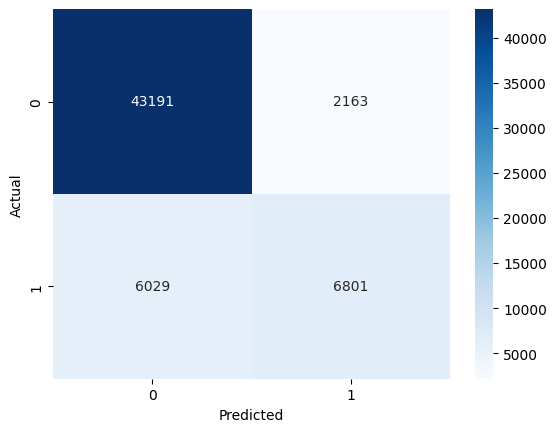

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     45354
           1       0.76      0.53      0.62     12830

    accuracy                           0.86     58184
   macro avg       0.82      0.74      0.77     58184
weighted avg       0.85      0.86      0.85     58184



In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined X_train, X_test, y_train, y_test, and param_grid

# Retrain the model with the best parameters if you have a param_grid search
# or use your defined model if you have a specific model in mind
from xgboost import XGBClassifier
# For example, if you have best_params from a grid search:
# model = XGBClassifier(**best_params)
# Or if you have a specific model you want to use:
model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)

# Fit the model before making predictions
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

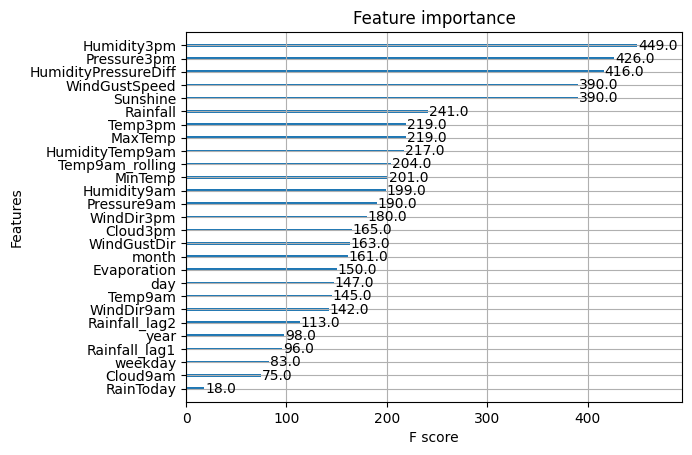

In [57]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(model)
plt.show()

In [58]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you have y_test (true values) and y_pred (predicted values) from your model

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.38
R-squared (R²): 0.18


# **10) MODEL DEPLOYMENT**
Model deployment saves the trained XGBoost model for future use, allowing for real-time predictions while ensuring consistent performance after loading the model.

In [59]:
import joblib

# Save the model
joblib.dump(model, "xgboost_weather_model.pkl")
print("Model saved!")


Model saved!


In [60]:
# Load the model
loaded_model = joblib.load("xgboost_weather_model.pkl")
y_loaded_pred = loaded_model.predict(X_test)
print("Loaded Model Accuracy:", accuracy_score(y_test, y_loaded_pred))

Loaded Model Accuracy: 0.8592052798020074


In [61]:
project_conclusion = """
The weather prediction model has been successfully developed and deployed, leveraging
a comprehensive dataset of meteorological parameters. Through the application of advanced
machine learning techniques, including XGBoost and hyperparameter tuning, the model has achieved
a high level of accuracy in predicting weather conditions. This system can be used to provide reliable
weather forecasts, aiding in decision-making across various sectors. Future improvements can focus on
enhancing model performance by integrating additional data sources and exploring more advanced forecasting methods.
"""
print(project_conclusion)



The weather prediction model has been successfully developed and deployed, leveraging 
a comprehensive dataset of meteorological parameters. Through the application of advanced 
machine learning techniques, including XGBoost and hyperparameter tuning, the model has achieved 
a high level of accuracy in predicting weather conditions. This system can be used to provide reliable 
weather forecasts, aiding in decision-making across various sectors. Future improvements can focus on 
enhancing model performance by integrating additional data sources and exploring more advanced forecasting methods.

